**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 08 – PCA

**Instructions:**
1. Construct the training and test sets: X_train, y_train, X_test, y_test from the fashion_mnist (Links to an external site.) dataset. Reshape X_train such that it becomes a 2D array.
2. Project X_train onto the hyperplane defined by the first d = 4 principal components. Make sure you scale your features.
3. Compute and display the number of principal components required to obtain
   - 75% variance
4. Apply PCA to compress X_train such that 75% of its variance is preserved.
5. Compared the size of the original X_train and the one obtained from step 4.
6. Use Logistic Regression as your classifier. Compare the computation time of classifier.fit() between using the original dataset and using the compressed dataset obtained from step 4.
7. Use the test set to compare the accuracy of the models generated in step 6 with and without applying PCA.

### Construct the training and test sets: train_X, train_Y, test_X, test_Y from the mnist dataset.

In [1]:
import torchvision
import numpy as np
# This may takes several minutes for downloading and processing
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
train_X = np.stack([np.array(im[0].getdata()) for im in trainset])
train_Y = np.stack([np.array(im[1]) for im in trainset])

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True)
test_X = np.stack([np.array(im[0].getdata()) for im in testset])
test_Y = np.stack([np.array(im[1]) for im in testset])

print(train_X.shape, train_Y.shape)

(60000, 784) (60000,)


### Scale the input X first

(60000, 784) (60000,)


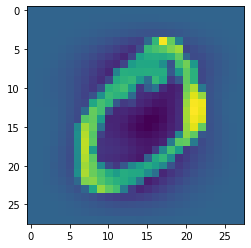

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print(train_X.shape, train_Y.shape)
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)

plt.imshow(train_X_scaled[1].reshape(28, 28))

### Project train_X_scaled onto the hyperplane defined by the first d = 4 principal components

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(train_X_scaled)

PCA(n_components=4)

### Display explained_variance_ratio_  of the PCA obtained

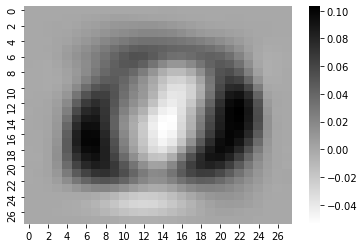

In [4]:
import seaborn as sns

sns.heatmap(pca.components_[0].reshape(28, 28), cmap='gray_r')

### Compute and display the number of principal components required to obtain 75% variance

In [5]:
pca = PCA()
pca.fit(train_X_scaled)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
d75 = None
for idx, ratio in enumerate(cum_sum_eigenvalues):
    if ratio >= 0.75:
        print('The 75% variance is at ', idx, ' with ', ratio)
        d75 = idx + 1
        break
print("  75% variance: {} at {}".format(ratio, d75))

The 75% variance is at  119  with  0.750153239916719
  75% variance: 0.750153239916719 at 120


**Task 1:** Apply PCA to compress train_X_scaled such that 75% of its variance is preserved. [10 points]

In [35]:
# TODO

### Compared the size of the original X_train and the one obtained from step 5

In [36]:
print("X_train size: {}".format(train_X_scaled.nbytes))
print("X_pca size: {}".format(train_X_scaled_pca.nbytes))

X_train size: 376320000
X_pca size: 57600000


**Task 2:** Use Logistic Regression as your classifier. Compare the computation time of classifier.fit() between using the original dataset and using the compressed dataset obtained. [10 points]

In [37]:
import time
from sklearn.linear_model import LogisticRegression

# TODO

/Users/hygao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hygao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

LogisticRegression()

**Task 3:** Use the test set to compare the accuracy of the models generated with and without applying PCA. [10 points]

In [38]:
from sklearn.metrics import accuracy_score

# TODO

print("Accuracy without PCA: {}".format(accuracy_score(y_test, y_pred_ori)))
print("Accuracy with PCA:    {}".format(accuracy_score(y_test, y_pred_pca)))

Accuracy without PCA: 0.032
Accuracy with PCA:    0.0326
